# Decision Tree

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.regressionplots as smrp
import sklearn as sk
import country_converter as coco
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [29]:
dichotomous_df = pd.read_csv('../datasets/processed/democracy/dichotomous/dichotomous-democracy-snapshot.csv', header=0)
world_bank_df = pd.read_csv('../datasets/processed/women/world-bank/women-business-and-the-law-snapshot.csv', header=0)
religious_diversity_df = pd.read_csv('../datasets/processed/religion/pew-research-center-religion-diversity/religious-diversity-index-extended.csv', header=0)

merged_df = dichotomous_df.merge(world_bank_df, on='iso3', how='inner', suffixes=('_f', '_g'))
merged_df = merged_df.merge(religious_diversity_df, on='iso3', how='inner', suffixes=('_f', '_g'))

print(f"Countries in Dichotomous Democracy: {len(dichotomous_df)}")
print(f"Countries in World Bank: {len(world_bank_df)}")
print(f"Countries in Religious Diversity: {len(religious_diversity_df)}")
print(f"Countries in all the datasets: {len(merged_df)}")
merged_df.head()

Countries in Dichotomous Democracy: 191
Countries in World Bank: 190
Countries in Religious Diversity: 230
Countries in all the datasets: 183


,iso3,country_f,ccode,abbreviation,abbreviation_undp,democracy,democracy_trans,democracy_breakdowns,democracy_duration,democracy_omitteddata,...,population,dominant_religion,maj_christian,maj_muslim,maj_unaffiliated,maj_hindu,maj_buddhist,maj_folk,maj_other,maj_jewish
0,USA,UNITED STATES OF AMERICA,2,USA,USA,1.0,0,0,206,1,...,310380000,christian,1,0,0,0,0,0,0,0
1,CAN,CANADA,20,CAN,CAN,1.0,0,0,139,1,...,34020000,christian,1,0,0,0,0,0,0,0
2,BHS,BAHAMAS,31,BHS,BHS,1.0,0,0,33,1,...,340000,christian,1,0,0,0,0,0,0,0
3,HTI,HAITI,41,HTI,HAI,0.0,0,0,186,0,...,9990000,christian,1,0,0,0,0,0,0,0
4,DOM,DOMINICAN REPUBLIC,42,DOM,DOM,1.0,0,0,40,1,...,9930000,christian,1,0,0,0,0,0,0,0


In [30]:
predictors = ["rdi", "wbl_index", "mobility", "workplace", "pay", "marriage", "parenthood", "entrepreneurship", "assets", "pension","rdi","maj_christian","maj_muslim","maj_unaffiliated","maj_hindu","maj_buddhist","maj_folk","maj_other","maj_jewish"]
X = merged_df[predictors]
y = merged_df["democracy"]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,)

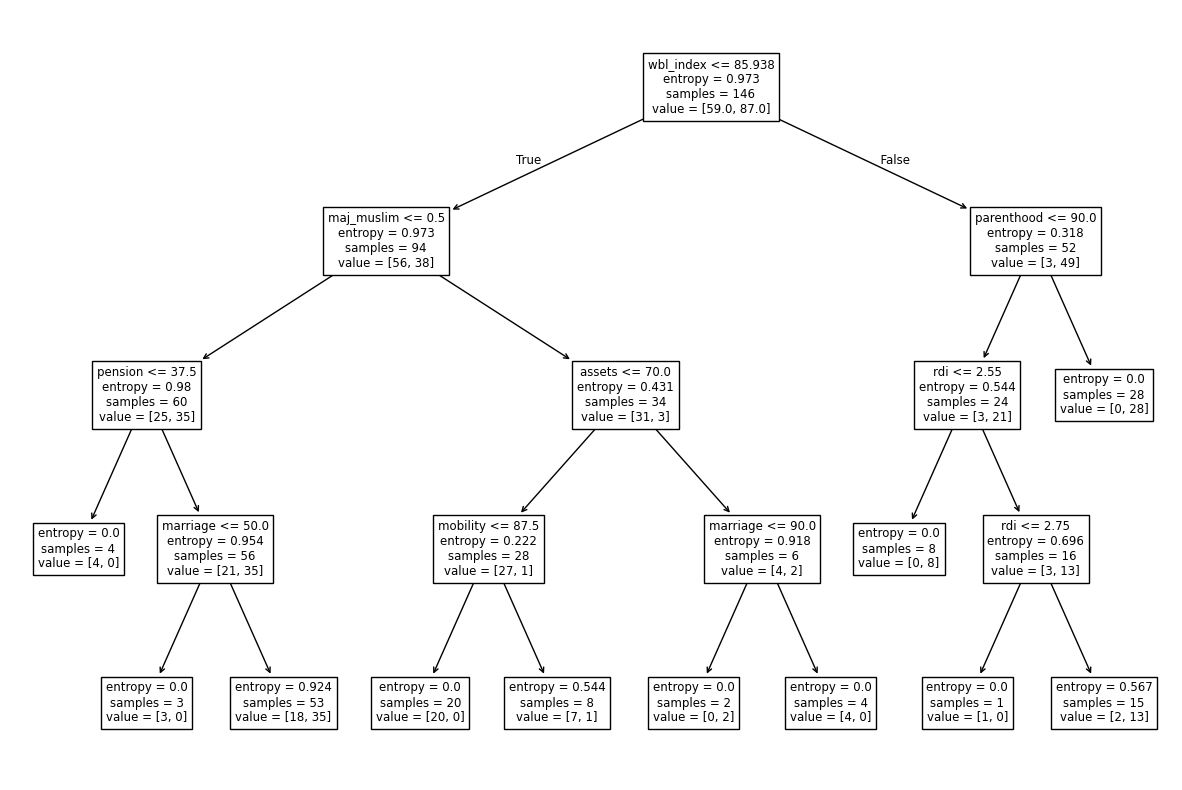

In [31]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
tree.fit(X=X_train, y=y_train)
plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=X_train.columns, max_depth=4)
plt.show()

In [32]:
# create dataframe of features
feature_df = pd.DataFrame(index=X_train.columns, data=tree.feature_importances_, columns=["Importance"])
feature_df.sort_values(by="Importance", ascending=False, inplace=True)
feature_df

,Importance
wbl_index,0.424333
maj_muslim,0.225110
marriage,0.124120
pension,0.066581
rdi,0.056665
parenthood,0.043629
assets,0.036195
mobility,0.023367
workplace,0.000000
entrepreneurship,0.000000


Verify precision

In [33]:
pred_train = tree.predict_proba(X_train)
pred_test = tree.predict_proba(X_test)
print("ROC AUC on training data for single tree: ", roc_auc_score(y_true=y_train, y_score=pred_train[:,1])) # only use second column
print("ROC AUC on test data for single tree: ", roc_auc_score(y_true=y_test, y_score=pred_test[:, 1]))

ROC AUC on training data for single tree:  0.917884278199883
ROC AUC on test data for single tree:  0.6602941176470588


The decision tree gives greater importance to:
- wbl_index
- If the country is majority muslim
- Other predictors like parenthood, pension, assets, and marriage